In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## As the worst image quality is in Fishing vessels folder, we will use that folder to train the model




In [5]:
# as the worst image quality is in Fishing vessels folder, we will use that folder to train the model
path = 'Data'
import os

images = os.listdir(path)
for i in images:
  
  print(i)


cargo
Container.zip
Fishing vessel
fishing vessels or small ships
Island.zip
Tanker.zip


# To view some images

TypeError: Image data of dtype object cannot be converted to float

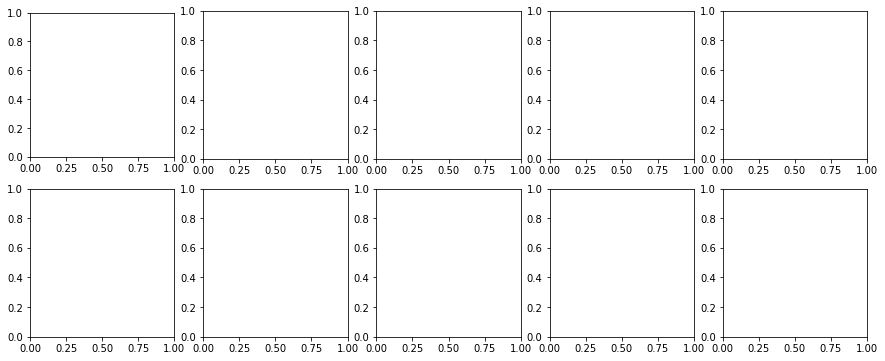

In [4]:
# view some images
# plt.imshow(cv2.imread('Fishing vessel\\d0003_png.rf.2f66e0edf6ca47fe60072754e297c801.jpg'), cmap='gray')

import cv2
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i in range(10):
  
  img = cv2.imread('Data\\'+images[i])
  axs[i].imshow(img, cmap='gray')
  axs[i].set_title(images[i])
  axs[i].axis('off')

plt.show()



# Applied Laplacian filter to the image
- ## Laplacian filter is a second derivative edge detection filter
- ## It is used to find edges in an image
- ## It is very sensitive to noise
- ## It is used to sharpen an image
- ## It is used to detect edges in an image
- ## It is used to enhance edges in an image

# 0 1 0
# 1 -4 1
# 0 1 0

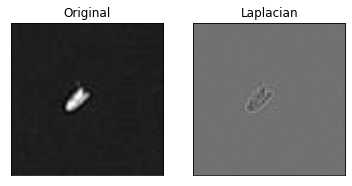

In [6]:
# apply laplacian mask to image, to get boundary details
# https://www.youtube.com/watch?v=ZmYPzESC5YY

# 0 1 0
# 1 -4 1
# 0 1 0

import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('Data//Fishing vessel//1.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

 
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
 
plt.show()

# Apply laplacian with diagonal neighbors

# 1  1  1
# 1 -8  1
# 1  1  1

  


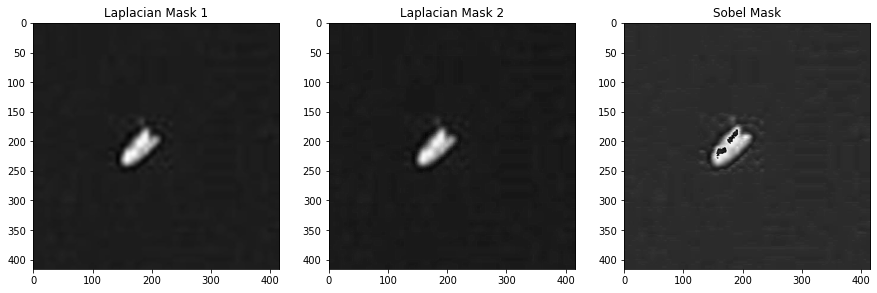

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def applyLaplacian(laplacianMask, img):
  # Apply laplacian filter to the image
  filteredImg = cv2.filter2D(img, -1, laplacianMask)
  
  # Add the filtered image to the original image to enhance the boundary information
  finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))
  
  return finalImg
  
def applySobel(sobelMask, img):
  # Apply sobel filter to the image
  filteredImg = cv2.filter2D(img, -1, sobelMask)
  
  # Add the filtered image to the original image to enhance the boundary information
  finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))
  
  return finalImg

# Load the image
img = cv2.imread('Data//Fishing vessel//1.jpg',0)

laplacianMask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  
final_img = applyLaplacian(laplacianMask, img)

laplacianMask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
final_img2 = applyLaplacian(laplacianMask2, img)

sobelMask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
final_img3 = applySobel(sobelMask, img)

# Display the images side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].imshow(final_img, cmap='gray')
axs[0].set_title('Laplacian Mask 1')
axs[1].imshow(final_img2, cmap='gray')
axs[1].set_title('Laplacian Mask 2')
axs[2].imshow(final_img3, cmap='gray')
axs[2].set_title('Sobel Mask')
plt.show()


# Now try histogram equalization
# https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html



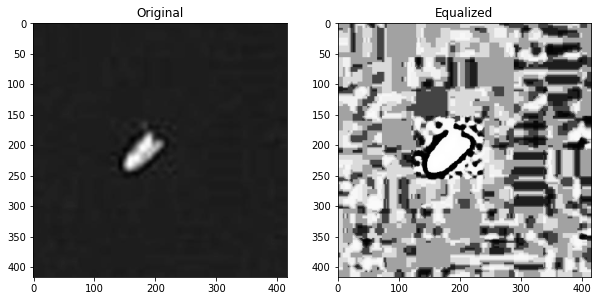

In [9]:
def hist_equalization(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    return img
# Load the image
img = cv2.imread(r'C:\Users\Owner\Documents\GitHub\Low-Resolution\model-backend\Data\Fishing vessel\1.jpg',0)

# Apply the histogram equalization method
equ = cv2.equalizeHist(img)
 
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(equ, cmap='gray'),plt.title('Equalized')
plt.show()


In [ ]:
# rename images in folders to 1.jpg, 2.jpg, 3.jpg, etc.
import os
folders = os.listdir('Data')
for folder in folders:
    print(folder)
    images = os.listdir('Data/'+folder)
    for i in range(len(images)):
        os.rename('Data/'+folder+'/'+images[i], 'Data/'+folder+'/'+str(i)+'.jpg')
         


cargo
Fishing vessel
fishing vessels or small ships


In [11]:
# train Xtratrees model
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

img = []
classes = []

for i in os.listdir('Data'):
  # if i is a folder
  if os.path.isdir('Data/'+i):
    for j in os.listdir('Data/'+i):
        temp = cv2.imread('Data/'+i+'/'+j)
        #convert to gray scale
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY) 
        temp = cv2.resize(temp, (224,224))
        # flatten the image
        temp = temp.flatten()
        img.append(temp)
        classes.append(i)

img = np.array(img)
classes = np.array(classes)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(img, classes, test_size=0.3, stratify=classes)

In [13]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(xtrain, ytrain)
print(model.feature_importances_)
# feat_importances = pd.Series(model.feature_importances_, index=xtrain.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()


[0.00000000e+00 0.00000000e+00 6.61933120e-05 ... 1.28672397e-03
 0.00000000e+00 0.00000000e+00]


In [14]:
# print accuracy of model
ypred = model.predict(xtest)
print("Accuracy:",accuracy_score(ytest, ypred))
print("Classification Report:", classification_report(ytest, ypred))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
# print("roc_auc_score", roc_auc_score(ytest, ypred))



Accuracy: 0.896
Classification Report:                                 precision    recall  f1-score   support

                Fishing vessel       0.92      0.96      0.94        79
                         cargo       0.96      0.70      0.81        33
fishing vessels or small ships       0.72      1.00      0.84        13

                      accuracy                           0.90       125
                     macro avg       0.87      0.89      0.86       125
                  weighted avg       0.91      0.90      0.89       125

Confusion Matrix:
 [[76  1  2]
 [ 7 23  3]
 [ 0  0 13]]


Dump the model using pkl

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
# now train model 2 after applying digital filter to the data
img = []
classes = []

for i in os.listdir('Data'):
    for j in os.listdir('Data/'+i):
        temp = cv2.imread('Data/'+i+'/'+j)
        #convert to gray scale
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY) 
        # apply digital filter
        temp = applyLaplacian(laplacianMask, temp)
        temp = cv2.resize(temp, (224,224))
        # flatten the image
        temp = temp.flatten()
        img.append(temp)
        classes.append(i)

img_laplacian = np.array(img)
classes = np.array(classes)

In [ ]:
# split the data into train and test
 
xtrain, xtest, ytrain, ytest = train_test_split(img_laplacian, classes, test_size=0.3, random_state=0, stratify=classes)

In [ ]:
model2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
model2.fit(xtrain, ytrain)
y_pred2 = model2.predict(xtest)
print("Accuracy:",accuracy_score(ytest, y_pred2))
print("Classification Report:",classification_report(ytest, y_pred2))
print("Confusion Matrix:\n",confusion_matrix(ytest, y_pred2))

 

Accuracy: 0.872
Classification Report:                                 precision    recall  f1-score   support

                Fishing vessel       0.88      0.97      0.92        79
                         cargo       0.91      0.64      0.75        33
fishing vessels or small ships       0.79      0.85      0.81        13

                      accuracy                           0.87       125
                     macro avg       0.86      0.82      0.83       125
                  weighted avg       0.88      0.87      0.87       125

Confusion Matrix:
 [[77  2  0]
 [ 9 21  3]
 [ 2  0 11]]


In [ ]:
def trymask(laplacianMask):
  img = []
  classes = []

  for i in os.listdir('Data'):
      for j in os.listdir('Data/'+i):
          temp = cv2.imread('Data/'+i+'/'+j)
          #convert to gray scale
          temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY) 
          # apply digital filter
          temp = applyLaplacian(laplacianMask, temp)
          temp = cv2.resize(temp, (224,224))
          # flatten the image
          temp = temp.flatten()
          img.append(temp)
          classes.append(i)

  img_laplacian = np.array(img)
  classes = np.array(classes)
  # split the data into train and test
  xtrain, xtest, ytrain, ytest = train_test_split(img_laplacian, classes, test_size=0.3, random_state=0, stratify=classes)
  model2 = ExtraTreesClassifier(n_estimators=100, random_state=0)
  model2.fit(xtrain, ytrain)
  y_pred2 = model2.predict(xtest)
  print("Accuracy:",accuracy_score(ytest, y_pred2))
  print("Classification Report:",classification_report(ytest, y_pred2))
  print("Confusion Matrix:\n",confusion_matrix(ytest, y_pred2))
  return model2

mdl = trymask(laplacianMask2)

Accuracy: 0.832
Classification Report:                                 precision    recall  f1-score   support

                Fishing vessel       0.81      0.99      0.89        79
                         cargo       0.94      0.48      0.64        33
fishing vessels or small ships       0.83      0.77      0.80        13

                      accuracy                           0.83       125
                     macro avg       0.86      0.75      0.78       125
                  weighted avg       0.85      0.83      0.82       125

Confusion Matrix:
 [[78  1  0]
 [15 16  2]
 [ 3  0 10]]


|Model Name|Accuracy|
|---|---|
|Laplacian+Model|87.4|
|Laplacian2+Model|83.2|
|Sobel+Model|84.8|
|Model|87.8|

 